Title: WIDS Palm Oil Plantation Prediction

Date : February  2019

Plan:

**First things First: snacks and chip checked, Coffee checked**

  1- Introduction
  
    - Data Field and Description
    
  2 -  Importing Libraries
    
  3 - Explore the dataset
    
    - Feature exploration and Cleaning
    
  4- Training using Convolution Neural Networks


# Introduction: 

This competiton touches on one of the major agricultural problems facing many Palm oil producing countries-  Deforestaion, biodiversity loss and Increase Green house emission.

Palm oil (Elæis guineensis) is the main cooking ingredient in the most tropical parts of the world like  Brazil, South East Asia and tropical part of Africa(particularly in Cameroon where i grew up). Extracted from the pulp of the fruit, this staple has so many uses and virtues. 

**To the Health:**

* Palm oil reduces cholestorol levels and some stusdies have found that palm oil can reduce the amount of bad LDL cholesterol in our body, keeping the hearts healthy and strong. Which brings us to the second virtue
* It slows the progression of Heart diseases
* Boosts Brain Health as it is jam-packed with a from of Vitamin E(tocotienol)  which has beneficial effects on brain health, skin and hair health too.
* Plam oil is an excellent source of the Vitamin A supplement -Beta-Carotene, whihc is important for maintaining good eye health, Also beneficial to pregnant women and their babies. ( Just a little anecdote: In my Country Cameroon, whenever an old women sees you wearing prescription eyeglasses, she will tell you "Come on!!! Take that thing off your eyes and consume more Palm oil". Happens to me all the time :') )
* Palm oil is high in beneficial antioxidant, which has been shown to reduce inflammation and Oxidative stress caused by free radicals.

**Additionally:**
 * It is also the cheapest vegetable oil in the world
 * Plam oil also produces palm kernel oil extracted from the endosperm which is mainly used in the cosmetics industry.  
 * Palm kernel waste (after the oil has beenextracted) is also used as animal feed and in co-firing in electricity generation.
 * it also has a natural preservative effect which extends the shelf life of food products That is why it is about half the package products sold in our grocery stores. From shampoo to detergents, to lipsticks, to bread, to cookies and even our Biodiesels, palm oil is present everywhere.
 
 **BUT BUT BUT.....** 
 * Plam oils cultivation is responsible for direct damage to flora and wildlife habitats due to forest conversion and the influx of palm oil workers increases pressure on wildlife through hunting .
 * Plam oils deforestation as a result of forest being destroyed, to keep up with the growing demands for palm oil, hence increasing greeenhouse gas emissions.
 * Palm oil production has major negative environmental consequences on soils (erosion potential on steep slopes) and water quality (pollution by pesticide run-off).
 * There has also been reports of Human rights violations by coorporations and companies that produce palm oil. Some of the issues incude, unsafe working conditions for the workers, Very low pay etc.
 
Despite the positive impacts and vitues of palm oil, its expansion has led to deforestation, increased carbon emissions, and biodiversity loss,.
 
# About the Challenge:

The challenge is to create a model that predicts the presence of oil palm plantations in satellite imagery. The datathon task is to train a model that takes as input a satellite image and outputs a prediction of how likely it is that the image contains an oil palm plantation. 

The dataset images are 3-meter spatial resolution, and each is labeled with whether an oil palm plantation appears in the image (0 for no plantation, 1 for any presence of a plantation).

Labeled training and test datasets are provided for model development.

# sOurce:
* https://news.mongabay.com/2016/04/palm-oil-cameroon-blessing-curse-small-scale-farmers-2/
* http://awsassets.panda.org/downloads/palmoildevelopmentcameroon_english.pdf
* https://www.excelvite.com/red-palm-oil-benefits-the-heart-brain-but-is-it-bad-for-the-environment/

**Data Fields and Description:**

**image_id** - an anonymous id unique to a given image.

**has_oilpalm** - the annotation or label for a given image, with 0 indicating no oil palm, and 1 indicating presence of oil palm plantations.

**score** - confidence score based on the aggregated results from crowdsourcing the annotations. This describes the level of agreement between multiple contributors, weighted by the contributor's trust score, and indicates Figure Eight's confidence in the validity of the result. For more details on how these scores are calculated, visit this article. Please note that this is extra data that need not be incorporated in your model, but may be useful. In addition, stay tuned for a blogpost focused more deeply on the data annotation process and more!

# 1- Importing Libraries

In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 2- Loading and Reading data

In [2]:
# #Loading the images paths
img_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train')
img_test_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set')
img_holdout_train_path = os.path.abspath(r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_holdout_data\valid_set')

#Image paths (Amy)
# img_train_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\train_images')
# img_test_path = os.path.abspath(r'C:\Users\Amy\KaggleProject\data\leaderboard_test_data')

In [3]:
# #oading the .csv file
data = pd.read_csv(r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\traininglabels (1).csv")
data.sample(5)

#Label path (Amy)
# data = pd.read_csv(r"C:\Users\Amy\KaggleProject\data\traininglabels.csv")
# data.sample(5)

,image_id,has_oilpalm,score
4444,img_064742017.jpg,0,1.0
9286,img_025992018.jpg,0,1.0
14267,img_098812018.jpg,0,1.0
1930,img_027872017.jpg,0,1.0
6946,img_101522017.jpg,1,1.0


# 3 - Data Preprocessing

In [4]:
data.describe()

,has_oilpalm,score
count,15244.000000,15244.000000
mean,0.061795,0.955769
std,0.240790,0.109367
min,0.000000,0.388700
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [5]:
data['has_oilpalm'].value_counts(normalize = True)

0    0.938205
1    0.061795
Name: has_oilpalm, dtype: float64

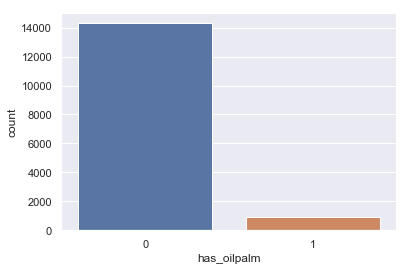

In [6]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'has_oilpalm', data = data)

In [7]:
data['score'].value_counts(normalize = True).head()

1.0000    0.834623
0.8000    0.001706
0.7992    0.001181
0.7981    0.001115
0.7976    0.000984
Name: score, dtype: float64

***************************************************************************************************************************

# Todo 1- Lets take a look at the different classes- 0 and 1

In [8]:
# We separate the classes 

label_1 = data[data['has_oilpalm']==1]
label_0 = data[data['has_oilpalm']==0]

In [9]:
# Plot the images in label 1
label_1.head()

,image_id,has_oilpalm,score
72,img_001092017.jpg,1,0.3944
75,img_001132017.jpg,1,1.0000
109,img_001712017.jpg,1,0.7543
129,img_002012017.jpg,1,1.0000
143,img_002232017.jpg,1,1.0000


In [10]:
label_1.shape

(942, 3)

In [11]:
label_0.shape

(14302, 3)

In [12]:
data.shape

(15244, 3)

To ease the image reading process we can create an additional column to the dataset with the global path of the images

In [13]:
label_1['image_path'] = [os.path.join(img_train_path,oilpalm) for oilpalm in label_1['image_id']]
label_0['image_path'] = [os.path.join(img_train_path,oilpalm) for oilpalm in label_0['image_id']]
label_1.head()

C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,image_id,has_oilpalm,score,image_path
72,img_001092017.jpg,1,0.3944,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
75,img_001132017.jpg,1,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
109,img_001712017.jpg,1,0.7543,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
129,img_002012017.jpg,1,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...
143,img_002232017.jpg,1,1.0000,C:\Users\mikel\OneDrive\WIDS-2019\wids dataset...


In [14]:
# We plot some of the pictures in the label_1 just to have an idea of what a plantation with oilpalm look like

haspalm_images = np.random.choice(label_1['image_path'],5)
nopalm_images = np.random.choice(label_0['image_path'],5)
haspalm_images  


array(['C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_019912017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_005632017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_006162017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_087922017.jpg',
       'C:\\Users\\mikel\\OneDrive\\WIDS-2019\\wids datasets\\train_images\\folder_train\\img_037262017.jpg'],
      dtype=object)

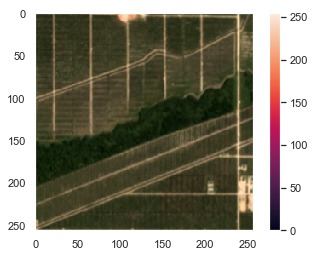

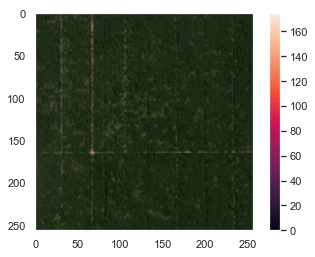

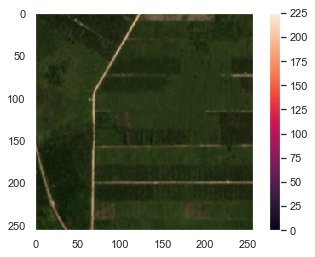

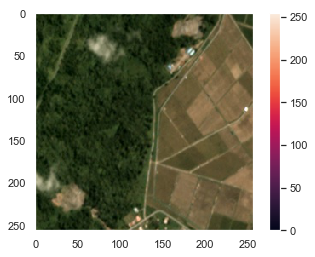

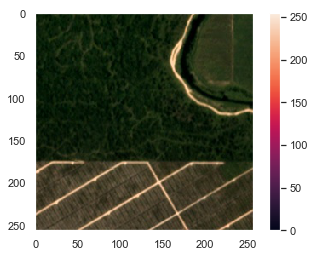

In [15]:
from PIL import Image

for image in haspalm_images:
    img  = Image.open(image)
    plt.imshow(img)
    plt.colorbar()
    plt.grid()== False
    plt.show()

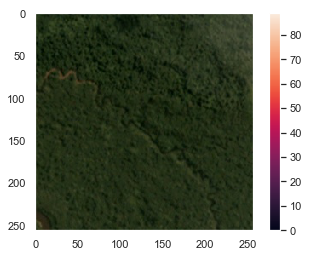

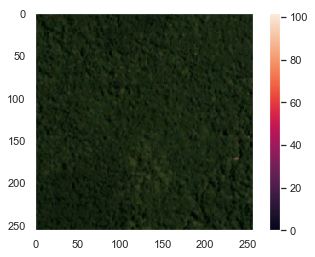

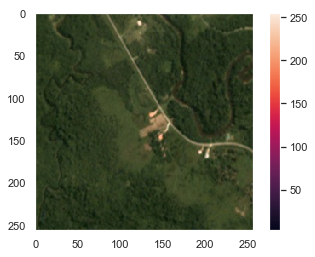

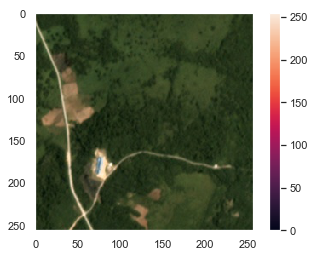

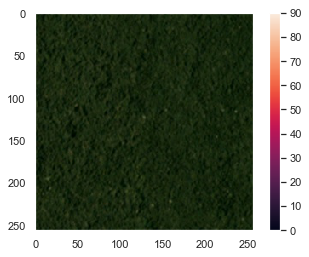

In [16]:
for image in nopalm_images:
    img  = Image.open(image)
    plt.imshow(img)
    plt.colorbar()
    plt.grid()== False
    plt.show()

## OBSERVATION:
- There are about 15 244 images with an equal number of score and max of 1 signifies that there is an oil palm while a 0 means no oil palm.

- There are non Null of NaN columns since the number of 'counts' in the data.describe are equivalent

- This dataset is very biase. 93 percent of the images(which corresponds to 14 302 images) does not have oilpalms while only 6 percent has oilpalms( approx. 942 images). Same with the scores, 83 percent of all scores are 1 while the remaining scores are about 16 percent.

- We can also see that the images with oil palms on them have some kind of stratifications on them while does with no oilpalms do not have these divisions.


# Do IT AGAIN. 

In [17]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

import os

FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # RGB color

Using TensorFlow backend.


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
__________

In [19]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [20]:
earlystop = EarlyStopping(patience=10)

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [22]:
callbacks = [earlystop, learning_rate_reduction]

In [23]:

data['has_oilpalm'][data["has_oilpalm"] == 0] = "no_palm"
data['has_oilpalm'][data["has_oilpalm"] == 1] = "has_palm"
data.sample(10)


C:\Users\mikel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,image_id,has_oilpalm,score
2216,img_032072017.jpg,no_palm,1.0000
3999,img_057872017.jpg,no_palm,1.0000
3301,img_047432017.jpg,no_palm,1.0000
11348,img_055732018.jpg,no_palm,0.7971
8991,img_021732018.jpg,has_palm,1.0000
970,img_014152017.jpg,no_palm,1.0000
14201,img_097842018.jpg,no_palm,1.0000
4200,img_060912017.jpg,no_palm,0.7988
2810,img_040342017.jpg,no_palm,1.0000
4432,img_064562017.jpg,no_palm,1.0000


In [24]:
train_df, validate_df = train_test_split(data, test_size=0.3, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

batch_size = 30

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train', 
    x_col='image_id',
    y_col='has_oilpalm',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=batch_size
)

Found 10670 images belonging to 2 classes.


In [26]:
print('In the Validation Set: ')
validation_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = validation_datagen.flow_from_dataframe(dataframe = validate_df, 
    directory= r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train",
    x_col = "image_id",
    y_col = "has_oilpalm",                                           
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    class_mode = 'binary'
)

In the Validation Set: 
Found 4574 images belonging to 2 classes.


In [27]:
#How does our generator work
example_df = train_df.sample(n=10).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
     directory= r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\train_images\folder_train",
    x_col = "image_id",
    y_col = "has_oilpalm",
    target_size=IMAGE_SIZE,
    class_mode='binary'
)



Found 10 images belonging to 2 classes.


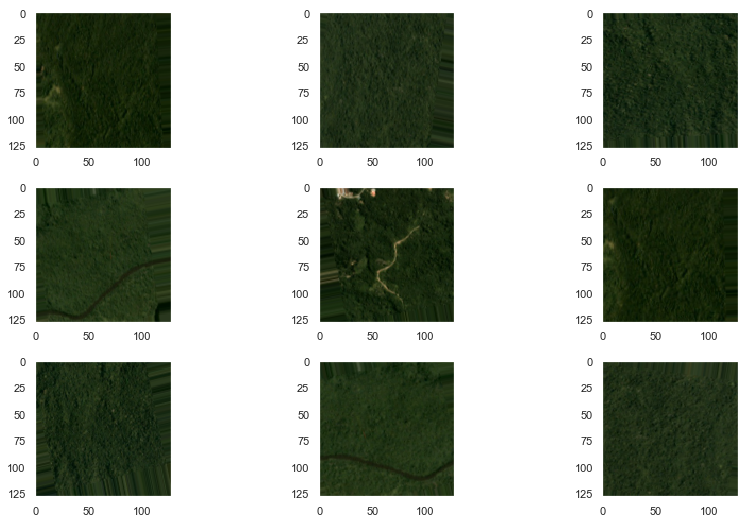

In [28]:
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        plt.grid(False)
        break
plt.tight_layout()
plt.show()


In [29]:
epochs=3 if FAST_RUN else 20

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

STEP_SIZE_TRAIN=total_train//batch_size

STEP_SIZE_VALID=total_validate//batch_size

history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=STEP_SIZE_TRAIN,
    steps_per_epoch=STEP_SIZE_VALID
    #callbacks=callbacks
)

Epoch 1/20
152/152 [==============================] - 699s 5s/step - loss: 0.4621 - acc: 0.8524 - val_loss: 0.5652 - val_acc: 0.9411
Epoch 2/20
152/152 [==============================] - 680s 4s/step - loss: 0.2597 - acc: 0.9281 - val_loss: 0.7697 - val_acc: 0.9432
Epoch 3/20
152/152 [==============================] - 680s 4s/step - loss: 0.2288 - acc: 0.9337 - val_loss: 0.1630 - val_acc: 0.9650
Epoch 4/20
152/152 [==============================] - 919s 6s/step - loss: 0.1741 - acc: 0.9461 - val_loss: 0.5147 - val_acc: 0.9454
Epoch 5/20
152/152 [==============================] - 703s 5s/step - loss: 0.1463 - acc: 0.9566 - val_loss: 0.3863 - val_acc: 0.8566
Epoch 6/20
152/152 [==============================] - 791s 5s/step - loss: 0.1423 - acc: 0.9539 - val_loss: 0.2728 - val_acc: 0.9506
Epoch 7/20
152/152 [==============================] - 1022s 7s/step - loss: 0.1193 - acc: 0.9621 - val_loss: 0.1455 - val_acc: 0.9656
Epoch 8/20
152/152 [==============================] - 1018s 7s/step 

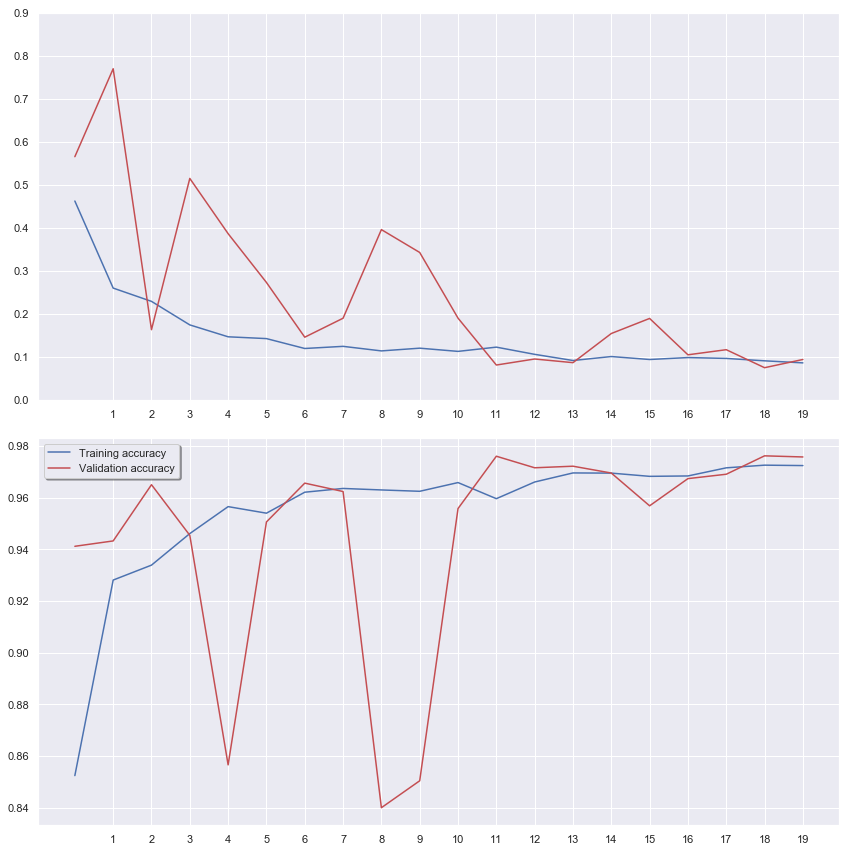

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


# Preparing test

In [75]:
test_filenames = os.listdir(r"C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data\test_set")
test_df = pd.DataFrame({
    'image_id': test_filenames
})

test_df.shape

(6534, 1)

In [76]:
# test_gen = ImageDataGenerator(rescale=1./255)
# test_generator = test_gen.flow_from_dataframe(
#     test_df, 
#     r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data', 
#     x_col='image_id',
#     y_col=None,
#     class_mode=None,
#     target_size=IMAGE_SIZE,
#     batch_size=batch_size,
#     shuffle=False
# )

print("\nIn the Test Set:")
test_generator = ImageDataGenerator(rescale = 1./255)
test_set = test_generator.flow_from_directory( 
    directory= r'C:\Users\mikel\OneDrive\WIDS-2019\wids datasets\leaderboard_test_data',
#     x_col = 'filename',
#     y_col = None,
    target_size = (128, 128),
    batch_size = batch_size,
    class_mode = None,
    shuffle=False,
    seed = 42
)




In the Test Set:
Found 6534 images belonging to 1 classes.


In [69]:
STEP_SIZE_TEST=test_set.n//test_set.batch_size

#predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

prediction = model.predict_generator(test_set, steps = test_set.n , verbose=1)

6534/6534 [==============================] - 4323s 662ms/step


In [70]:
len(prediction)

195840

In [71]:
# #we evaluate the performance of our model on the validation data.
# score = model.evaluate(validation_generator, verbose = 0)
# print("The accuracy of the validation is: ", score[1])
# print("The loss of the validation is: ", score[0])

threshold = 0.5
test_df['probabilities'] = prediction[:6534]
test_df['has_oilpalm'] = np.where(test_df['probabilities'] > threshold, 0,1)

In [72]:
test_df.sample(20)

,image_id,probabilities,has_oilpalm
5893,img_099452017.jpg,9.932455e-01,0
1147,img_019412017.jpg,1.391255e-01,1
2021,img_034602017.jpg,9.602557e-01,0
6475,img_110492018.jpg,9.922583e-01,0
4513,img_076632017.jpg,9.999905e-01,0
1201,img_020302017.jpg,9.588355e-05,1
5534,img_093532017.jpg,9.999154e-01,0
2845,img_049032018.jpg,8.084412e-01,0
868,img_014492018.jpg,9.993305e-01,0
5098,img_086032018.jpg,9.999652e-01,0


In [74]:
submission_df = test_df.copy()
submission_df.drop('probabilities', axis=1, inplace=True)
submission_df.to_csv('submission_01.csv', index=False)

submission_df.sample(20)

,image_id,has_oilpalm
1829,img_031112018.jpg,0
4010,img_068652018.jpg,0
4622,img_078312018.jpg,0
153,img_002272018.jpg,0
5602,img_094722018.jpg,0
2676,img_046272018.jpg,0
587,img_009582018.jpg,0
3269,img_056502017.jpg,0
6064,img_102802017.jpg,0
3181,img_054922017.jpg,0


Referencec:
- https://towardsdatascience.com/a-comprehensive-hands-on-guide-to-transfer-learning-with-real-world-applications-in-deep-learning-212bf3b2f27a
- https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8
- https://www.tensorflow.org/tutorials/keras/basic_classification
- https://www.kaggle.com/jhonatansilva31415/whales-a-simple-guide
- https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751
- https://www.kaggle.com/gpreda/cats-or-dogs-using-cnn-with-transfer-learning
- https://medium.com/neuralspace/kaggle-1-winning-approach-for-image-classification-challenge-9c1188157a86
- https://towardsdatascience.com/dealing-with-imbalanced-classes-in-machine-learning-d43d6fa19d2
- https://towardsdatascience.com/deep-learning-unbalanced-training-data-solve-it-like-this-6c528e9efea6

****************************************************************************************************************************